## Code for inference on a single image

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import os

In [4]:
drive.mount('/content/drive')
GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/people-and-pets-recognition'

Mounted at /content/drive


In [5]:
!wget https://cdn.pixabay.com/photo/2023/08/18/15/02/dog-8198719_960_720.jpg -O dog.jpg
!wget https://cdn.pixabay.com/photo/2017/03/21/15/08/child-2162410_1280.jpg -O child.jpg

--2024-07-25 12:09:30--  https://cdn.pixabay.com/photo/2023/08/18/15/02/dog-8198719_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.147.160, 104.18.40.96, 2606:4700:4400::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84306 (82K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  82.33K  --.-KB/s    in 0.01s   

2024-07-25 12:09:30 (6.21 MB/s) - ‘dog.jpg’ saved [84306/84306]

--2024-07-25 12:09:30--  https://cdn.pixabay.com/photo/2017/03/21/15/08/child-2162410_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.147.160, 104.18.40.96, 2606:4700:4400::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269181 (263K) [binary/octet-stream]
Saving to: ‘child.jpg’

child.jpg           100%[===================>] 262.87K  --.-KB/s  

In [6]:
# Load out YOLO model
model_path = os.path.join(GOOGLE_DRIVE_PATH, "trained_yolo_model_aug.pt")
yolo_model = YOLO(model_path)


0: 640x448 1 pet, 539.4ms
Speed: 34.7ms preprocess, 539.4ms inference, 26.2ms postprocess per image at shape (1, 3, 640, 448)


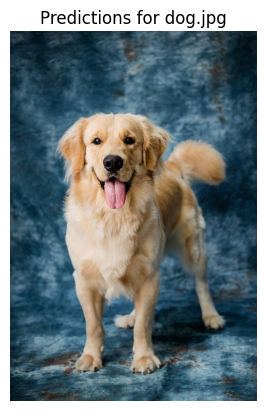

In [7]:
image_path = "dog.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform inference
results = yolo_model(image_rgb)

# Plot the results
results[0].show()
plt.imshow(image_rgb)
plt.title(f"Predictions for {image_path}")
plt.axis('off')
plt.show()


0: 640x448 1 person, 205.1ms
Speed: 8.5ms preprocess, 205.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


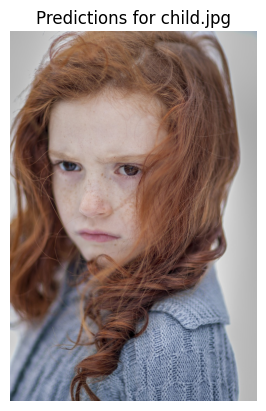

In [8]:
image_path = "child.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform inference
results = yolo_model(image_rgb)

# Plot the results
results[0].show()
plt.imshow(image_rgb)
plt.title(f"Predictions for {image_path}")
plt.axis('off')
plt.show()